In [ ]:
!pip install tensorflow pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cargar datos
data = pd.read_csv("/content/translated_dataset.csv")

#Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['label'].tolist())
data['label'] = le.transform(data['label'].tolist())

# Crear un nuevo dataset con Xcut elementos de cada label:
Xcut = 200
dfcut = pd.concat([data[data['label'] == i].sample(Xcut, random_state=42) for i in range(6)], ignore_index=True)

# Muestra la cantidad de cada label:
dfcut.label.value_counts(dropna=False)
data = dfcut

In [ ]:
data

,text,label
0,"Vamos a ver una película, Anthony.\nEso suena ...",0
1,Todos los años vamos a Florida. Nos gusta ir a...,0
2,Paula tiene cáncer. Le quedan seis meses de vi...,0
3,Hay una gran rotura aquí.\n¡Pero hay cinta en ...,0
4,Patty tiene una muñeca para Navidad. Es su muñ...,0
...,...,...
1195,El rechazo anarquista de la autoridad tiene ap...,5
1196,Nadie sabe cuál fue el primero: la crisis econ...,5
1197,"Durante casi 100 años, la policía y las agenci...",5
1198,El ataque mortal en Kabul contra los fieles ch...,5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.5, random_state=0)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the model
model = LinearSVC()
model.fit(X_train_vec, y_train)  # Use the vectorized training data

# Predict on the test data
y_pred = model.predict(X_test_vec)  # Use the vectorized test data

In [ ]:
from sklearn import metrics

GT = y_test.tolist()
print(metrics.classification_report(GT, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        98
           1       0.49      0.58      0.53       101
           2       0.47      0.26      0.33       108
           3       0.39      0.30      0.34       101
           4       0.37      0.63      0.46        86
           5       0.74      0.69      0.72       106

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600



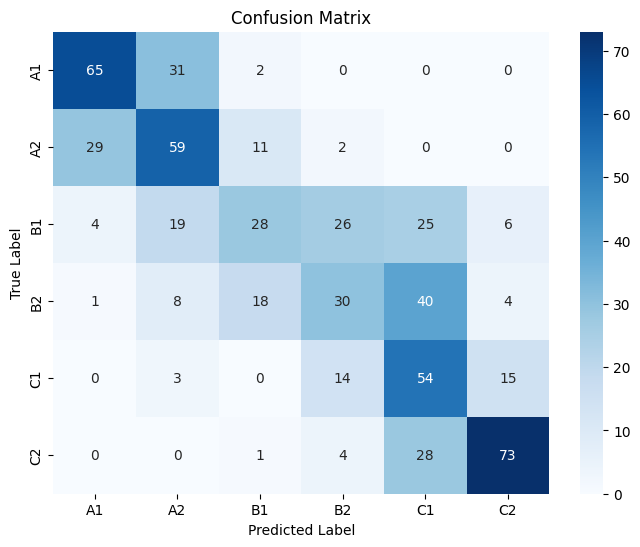

In [ ]:
Cla# prompt: Necesito graficar una matriz de confufusón con los datos predecidos del modelo

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
